In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as mcol

import numpy as np
import pandas as pd

# get numeric encoding from amber website

In [2]:
encoding = pd.read_html('https://amberhub.chpc.utah.edu/secstruct/', header=0, index_col=1)[0]
encoding['DSSP Char'] = encoding['DSSP Char'].str.slice(1, -1)
encoding['color'] = [
        '#d0d0e0', #platin
        '#94ffff', #yttrium
        '#54B5B5', #molybdenum
        '#ffa100', #selen
        '#90e050', #fluorine
        '#bd80e3', #arsenic
        '#175487', # iridium
        '#F090A0', #germanium
    ]
encoding

,Character,DSSP Char,SS type,color
Integer,,,,
0,0,,None,#d0d0e0
1,b,E,Parallel Beta-sheet,#94ffff
2,B,B,Anti-parallel Beta-sheet,#54B5B5
3,G,G,3-10 helix,#ffa100
4,H,H,Alpha helix,#90e050
5,I,I,Pi (3-14) helix,#bd80e3
6,T,T,Turn,#175487
7,S,S,Bend,#F090A0


In [3]:
cmap = mcol.ListedColormap(
    name='secondary_structure_cmap',
    colors=encoding.color
)
cmap

# read in data file

In [4]:
base = Path('/media/storage_6/ati/Chig_traj/cluster_cig_tip3p_rep1/secstruc_chig_tip3p_1')
base

PosixPath('/media/storage_6/ati/Chig_traj/cluster_cig_tip3p_rep1/secstruc_chig_tip3p_1')

In [5]:
df = pd.read_csv(base, sep='\s+', index_col=[0])
df

,GLY:1,TYR:2,ASP:3,PRO:4,GLU:5,THR:6,GLY:7,THR:8,TRP:9,GLY:10
#Frame,,,,,,,,,,
1,0,2,0,6,6,6,0,0,2,0
2,0,2,0,6,6,6,0,0,2,0
3,0,1,1,6,6,6,6,1,1,0
4,0,1,1,6,6,6,6,1,1,0
5,0,1,1,6,6,6,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...
299996,0,0,0,0,0,0,0,0,0,0
299997,0,0,7,0,0,0,0,0,0,0
299998,0,0,7,0,0,0,0,0,0,0


# plot

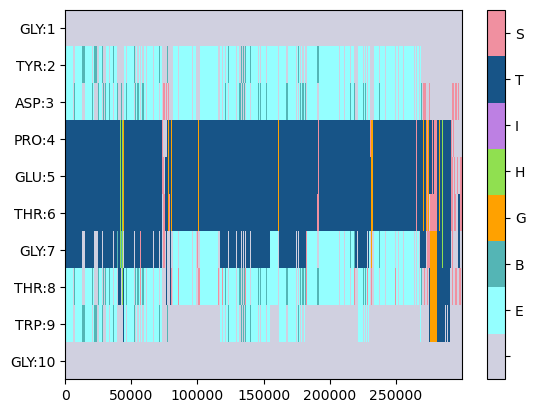

In [6]:
fig, ax = plt.subplots()

_map = ax.matshow(df.T, aspect='auto', cmap=cmap)

# axis settings
ax.xaxis.tick_bottom()
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns)

# cbar settings
cbar = fig.colorbar(_map, ticks=np.arange(3.5/8, 8, 0.875))
cbar.set_ticklabels(encoding['DSSP Char'])